In [86]:
import os 
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

# change dir to project dir
if 'changed' not in globals():
    os.chdir('../../../')
    changed = 1

In [87]:
outdir = 'results/motif_pairs/chrom_correction_only/summary/'
os.makedirs(outdir, exist_ok=True)

In [112]:
# output directory for simulations
num_top_motifs = 50
num_top_motifs = 100 
SAMPLE_NAME='*'

mp_data_dir = 'results/motif_pairs/chrom_correction_only/'
glob_path = mp_data_dir + f'{SAMPLE_NAME}/Q_values_sig.top_{num_top_motifs}_count.tsv'
fns = glob(glob_path.format(glob_path))

In [151]:
# load the data
data = []
for fn in fns:

    sample_name = fn.split('/')[-2]
    tdf = pd.read_table(fn)
    tdf['sample_name'] = sample_name
    data.append(tdf)

all_df = pd.concat(data)
#all_df = all_df.loc[all_df['Q_value'] < 0.05]
all_df = all_df.loc[all_df['Q_value'] < 0.00001]
print(all_df.shape)

(3173, 9)


In [152]:
# sort the pairs before working with them
def sort_pairs(sr):
    pairs_list = [sr.Motif1, sr.Motif2]
    return(sorted(pairs_list))
anchor_sorted_1, anchor_sorted_2 = zip(*all_df.apply(sort_pairs, axis=1))
all_df.loc[:, 'anchor_sorted_1'] = anchor_sorted_1
all_df.loc[:, 'anchor_sorted_2'] = anchor_sorted_2
all_df.loc[:, 'pair_sorted'] = all_df.loc[:, 'anchor_sorted_1'] + ',' + all_df.loc[:, 'anchor_sorted_2']

In [153]:
def get_log10(x, replace_inf=1000000):
    log_val = -np.log(x)
    if log_val < np.inf:
        return(log_val)
    else:
        return(replace_inf)
    
# set replace_inf = 12 because 
# all_df.loc[~np.isinf(all_df['-log_qvalue'])]['-log_qvalue'].max() == 11
all_df.loc[:, '-log_qvalue'] = all_df.Q_value.apply(get_log10, args=[11])
#all_df.loc[:, '-log_qvalue'] = all_df.Q_value.apply(lambda x: -np.log(x))

/tmp/ipykernel_123862/1728400676.py:2: RuntimeWarning: divide by zero encountered in log
  log_val = -np.log(x)


### Summary of Motif Pairs

In [156]:
mp_counts_ss = mp_grps.count()
mp_grps = all_df.groupby(['pair_sorted']) 
mp_counts_ss = mp_grps.count()['Motif1'].rename('pair_count').to_frame()
mp_counts_ss.sort_values(['pair_count'], ascending=[False], inplace=True)

In [157]:
mp_counts_ss

,pair_count
pair_sorted,
"ZNF135,ZNF460",20
"THRA,ZNF460",19
"KLF15,KLF5",18
"SP3,SP9",18
"KLF2,KLF6",18
"KLF5,PATZ1",18
"KLF15,PATZ1",18
"PATZ1,ZNF281",18
"MAZ,ZNF148",17


<Axes: xlabel='pair_count', ylabel='Count'>

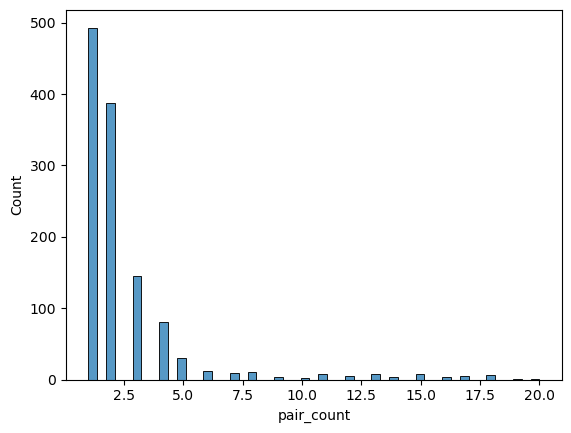

In [158]:
sns.histplot(mp_counts_ss.pair_count)

### Summary of 1D Motif

In [159]:
left_df = all_df.drop(['anchor_sorted_2'], axis=1).rename(columns={'anchor_sorted_1': 'Motif'})
right_df = all_df.drop(['anchor_sorted_1'], axis=1).rename(columns={'anchor_sorted_2': 'Motif'})
oned_motif_df = pd.concat([left_df, right_df])

In [160]:
oned_motif_df.head()

,Motif1,Motif2,Sim_Count,P_value,Obs_Count,Contain_1,Contain_2,Q_value,sample_name,Motif,pair_sorted,-log_qvalue
1,SP5,ZNF148,0,0.0,616,True,True,0.0,Natural_Killer_1815-RH-1.phs001703v3p1.Homo_Sa...,SP5,"SP5,ZNF148",11
88,ZNF148,ZNF281,0,0.0,1013,True,True,0.0,Natural_Killer_1815-RH-1.phs001703v3p1.Homo_Sa...,ZNF148,"ZNF148,ZNF281",11
195,PATZ1,PRDM9,0,0.0,1480,True,True,0.0,Natural_Killer_1815-RH-1.phs001703v3p1.Homo_Sa...,PATZ1,"PATZ1,PRDM9",11
389,PRDM9,ZNF320,0,0.0,842,True,True,0.0,Natural_Killer_1815-RH-1.phs001703v3p1.Homo_Sa...,PRDM9,"PRDM9,ZNF320",11
400,KLF15,PATZ1,0,0.0,1309,True,True,0.0,Natural_Killer_1815-RH-1.phs001703v3p1.Homo_Sa...,KLF15,"KLF15,PATZ1",11


In [161]:
motif_grps = oned_motif_df.groupby(['Motif']) 
motif_counts_ss = motif_grps.count()['Motif1'].rename('motif_count').to_frame()
motif_counts_ss.sort_values(['motif_count'], ascending=[False], inplace=True)

In [162]:
motif_counts_ss

,motif_count
Motif,
ZNF460,356
PATZ1,309
KLF5,257
ZNF281,249
ZNF320,243
KLF15,237
ZNF135,225
PRDM9,207
KLF4,184


#### Making a jointplot of the motif-pair frequencies for different sample sets 

In [163]:
# extract the counts for the current set
pd.options.display.min_rows = None
pd.options.display.max_rows = 50

a_plus_counts = mp_counts_ss
display(a_plus_counts.reset_index())
#pd.options.display.min_rows = 100

,pair_sorted,pair_count
0,"ZNF135,ZNF460",20
1,"THRA,ZNF460",19
2,"KLF15,KLF5",18
3,"SP3,SP9",18
4,"KLF2,KLF6",18
5,"KLF5,PATZ1",18
6,"KLF15,PATZ1",18
7,"PATZ1,ZNF281",18
8,"MAZ,ZNF148",17
9,"KLF15,ZNF281",17


In [164]:
# take the top n only
topn = 10000
topn = 25
a_plus_counts = a_plus_counts.sort_values('pair_count', ascending=False).iloc[0:topn]

# convert the index into two columns and sort 
left_anchors, right_anchors = list(zip(*map(lambda x: x.split(','), a_plus_counts.index)))
a_plus_counts['anchor_sorted_1'] = left_anchors
a_plus_counts['anchor_sorted_2'] = right_anchors
a_plus_counts.sort_values(['anchor_sorted_1', 'anchor_sorted_2'], ascending=[True, True], inplace=True)

# add reverse in order to have a symmetric matrix after pivoting 
a_plus_counts_rev = a_plus_counts.rename(columns={'anchor_sorted_1': 'anchor_sorted_2', 'anchor_sorted_2': 'anchor_sorted_1'})
a_plus_counts = pd.concat([a_plus_counts, a_plus_counts_rev])

# pivot the data into matrix for and fillna
a_plus_counts_matrix = a_plus_counts.pivot_table(index='anchor_sorted_2', columns='anchor_sorted_1', values='pair_count', fill_value=0)
#a_plus_counts_matrix.fillna(0, inplace=True)

# reverse the index values 
rev_index = list(reversed(sorted(a_plus_counts_matrix.index)))
a_plus_counts_matrix = a_plus_counts_matrix.loc[rev_index]

a_plus_counts_matrix.shape

(17, 17)

In [165]:
# calculate frequencies for the column panel
col_idxs = a_plus_counts_matrix.columns.tolist()
col_oned_motif_counts = motif_counts_ss.loc[col_idxs].reset_index()

# calculate frequencies for the row panel
row_idxs = a_plus_counts_matrix.index.tolist()
row_oned_motif_counts = a_plus_counts_matrix.sum().loc[row_idxs].to_frame().reset_index()
row_oned_motif_counts.columns = ['Motif', 'topn_freq']

# calculating the number 
num_a_samples = all_df.drop_duplicates(['sample_name']).shape[0]

In [166]:
num_a_samples

20

In [167]:
#fig = plt.figure(figsize=(8, 6))
#fig = plt.figure(figsize=(16, 12))

generate_plot1 = False
if generate_plot1 == True:
        
    fig = plt.figure(figsize=(32, 24))

    hspace = 0.03
    wspace = 0.05

    purple_rgb = tuple([0.57916573903086, 0.33934576125314425, 0.5219003947563425])

    # making the gridspec and separating each piece
    grid = GridSpec(2, 4, figure=fig, height_ratios=[1, 3], width_ratios=[3, 1, 0.5, 0.1], hspace=hspace, wspace=wspace)

    top_panel = fig.add_subplot(grid[0, 0])
    large_box = fig.add_subplot(grid[1, 0])

    right_panel = fig.add_subplot(grid[1, 1])
    legend_panel = fig.add_subplot(grid[1, 3])

    # drawing a heatmap in the large box
    #sns.heatmap(a_plus_counts_matrix, robust=False, ax=large_box, xticklabels=True, yticklabels=True, cbar_kws={'location': 'bottom'})
    sns.heatmap(a_plus_counts_matrix / num_a_samples, robust=False, ax=large_box, annot=a_plus_counts_matrix,
                xticklabels=True, yticklabels=True,
                cbar=True, cbar_ax=legend_panel, 
                cmap=sns.cubehelix_palette(as_cmap=True), linewidths=0.003,
                cbar_kws={'label': 'Proportion of Samples with Q-value < 0.05 (N = {})'.format(num_a_samples), 'location': 'left'})
    large_box.set(xlabel='', ylabel='')

    # drawing a barplot of 1D motif frequencies across the whole genome
    sns.barplot(x='Motif', y='Sim_Count', data=col_oned_motif_counts, color=purple_rgb, ax=top_panel)
    top_panel.set(xticklabels=[], xlabel='', ylabel='Genome-wide\nFrequency', xticks=[])
    sns.despine(ax=top_panel, right=True, top=True)

    # drawing a barplot of 1D motif frequencies across the top 25 motif pairs
    sns.barplot(y='Motif', x='topn_freq', data=row_oned_motif_counts, color=purple_rgb, ax=right_panel)
    right_panel.set(yticklabels=[], ylabel='', xlabel=f'Top {topn}\nFrequency', yticks=[])
    sns.despine(ax=right_panel, right=True, top=True)

    # save the figure 
    fn = os.path.join(outdir, f'motif_pair_distributions.{topn}.png')
    fig.savefig(fn, dpi=600, bbox_inches='tight')

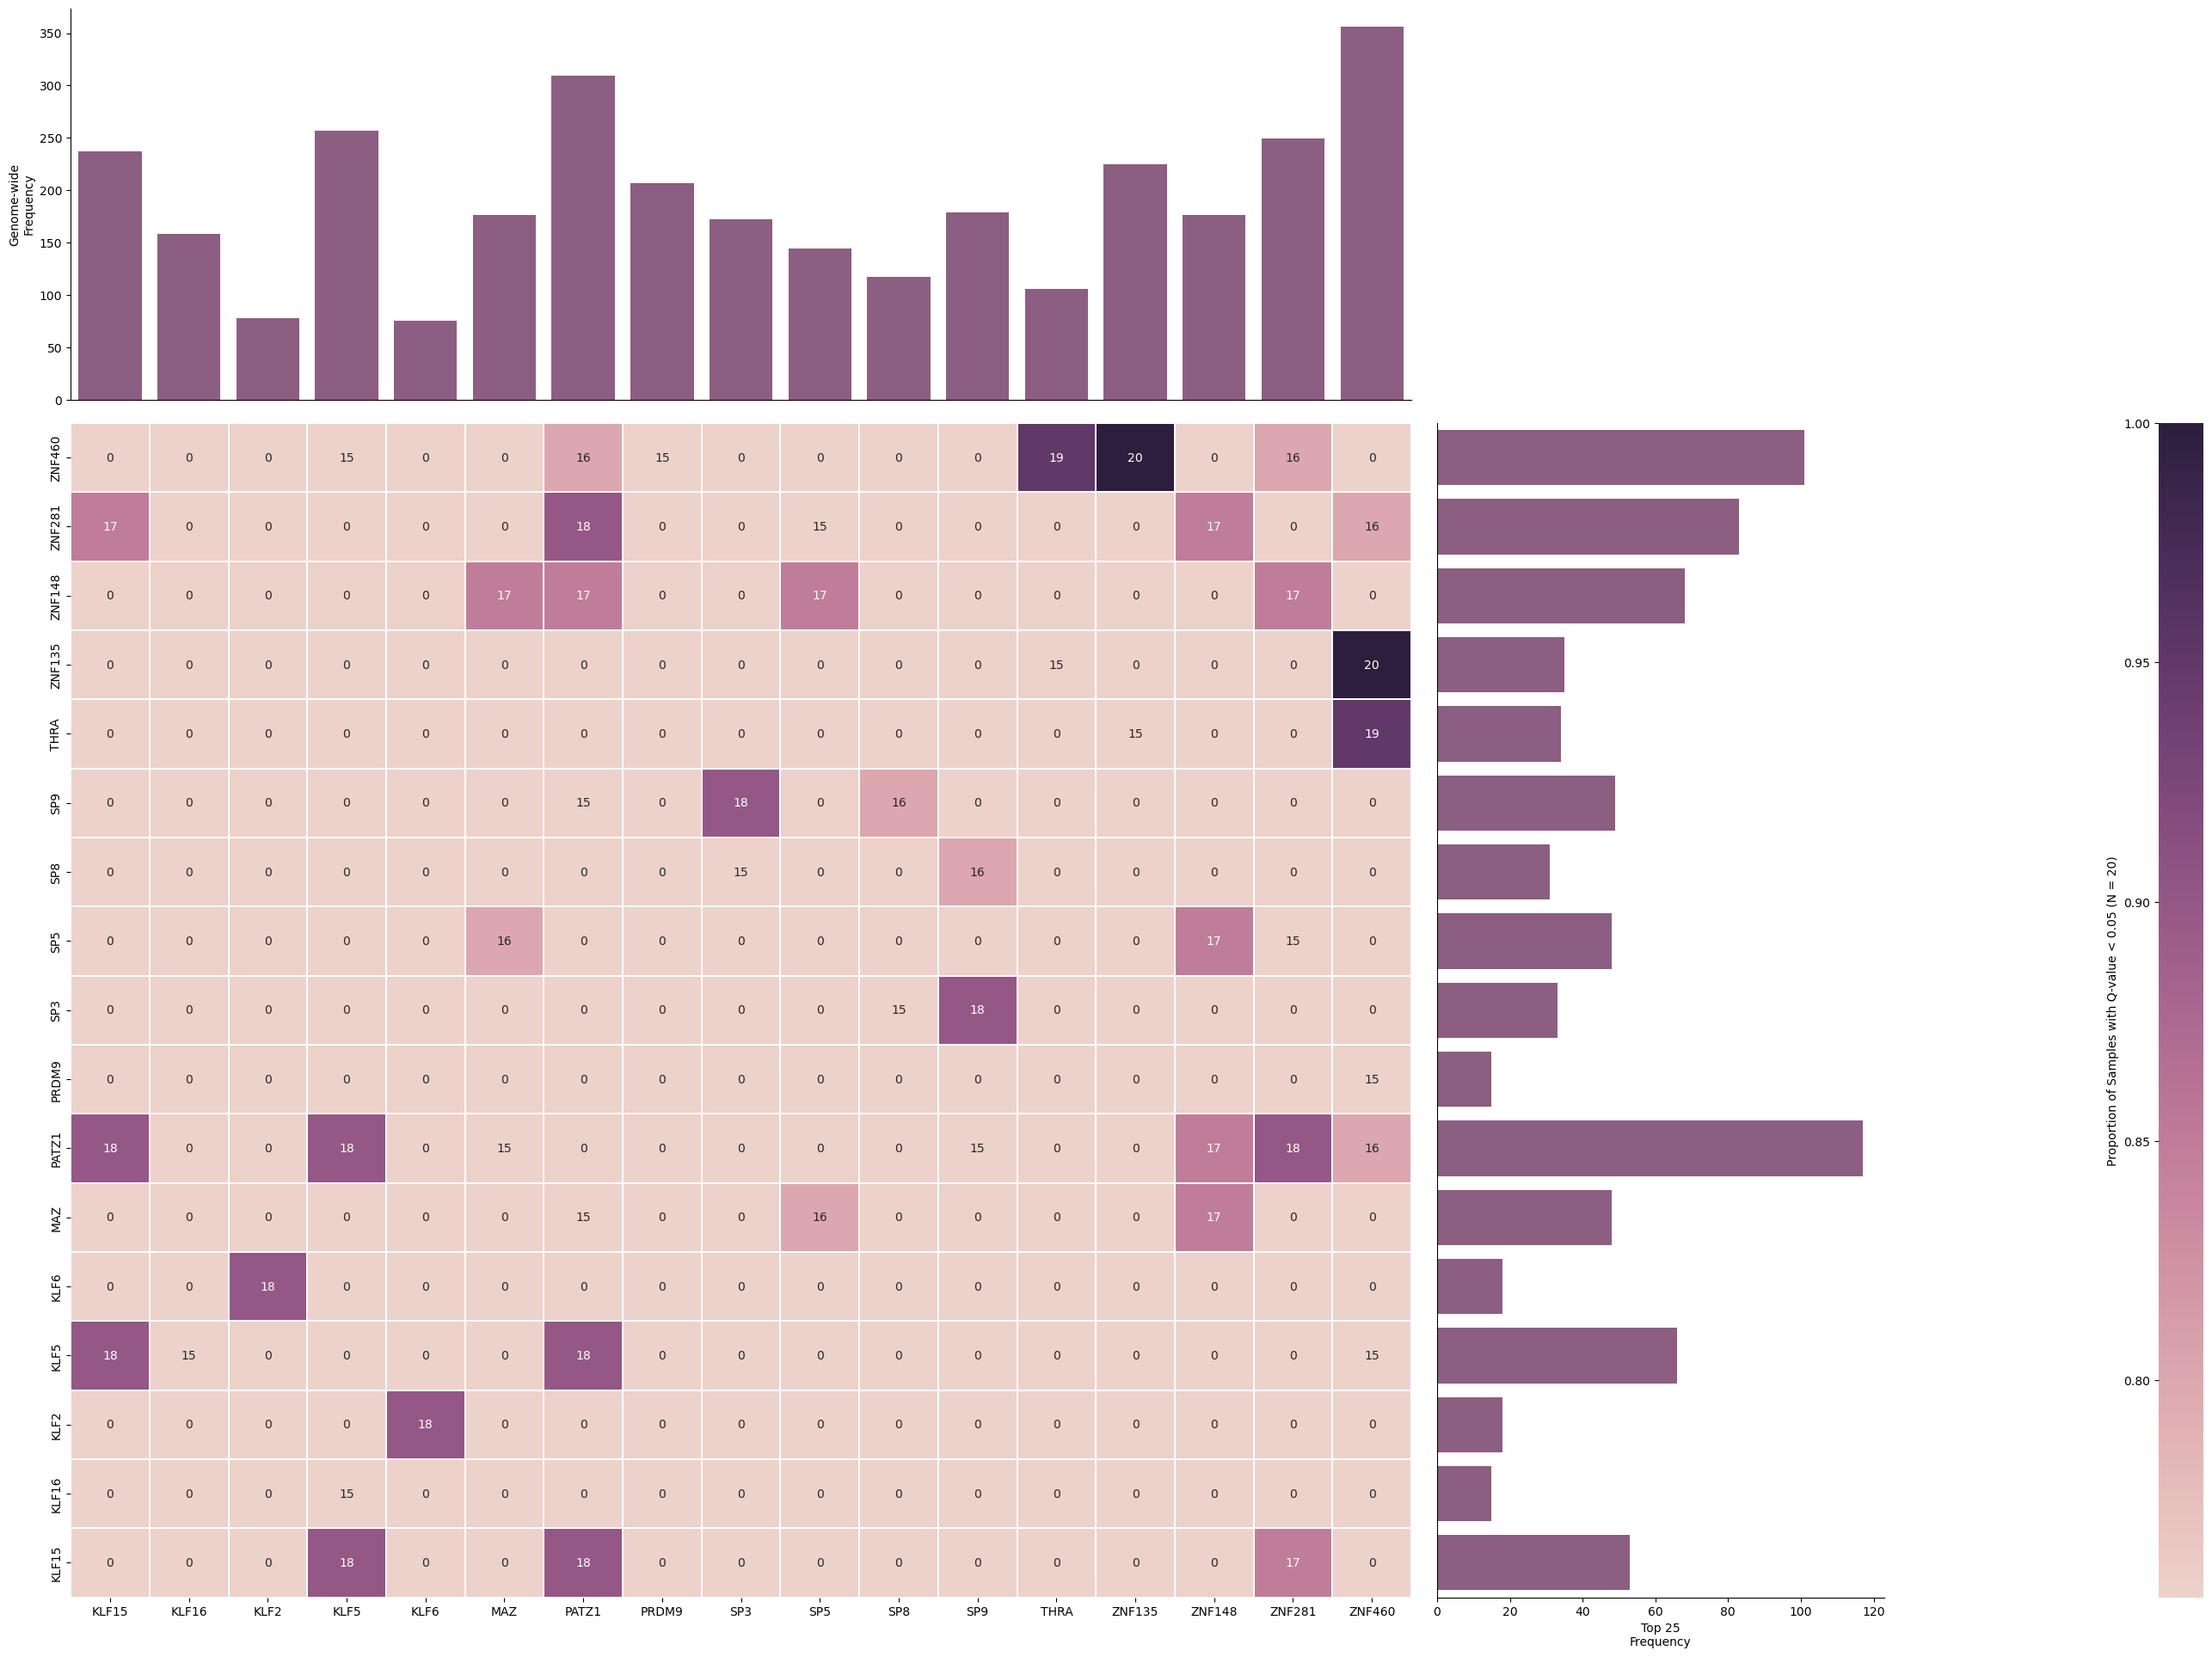

In [168]:
#fig = plt.figure(figsize=(8, 6))
#fig = plt.figure(figsize=(16, 12))
fig = plt.figure(figsize=(32, 24))

vopt_dict = {25: {'vmin': 40/53, 'vmax': 1},
             100: {'vmin': 0.25, 'vmax': 1},
             10000: {'vmin': 0.50, 'vmax': 1}}
generate_plot1 = True
if generate_plot1 == True:
    
    hspace = 0.03
    wspace = 0.05

    purple_rgb = tuple([0.57916573903086, 0.33934576125314425, 0.5219003947563425])

    # making the gridspec and separating each piece
    grid = GridSpec(2, 4, figure=fig, height_ratios=[1, 3], width_ratios=[3, 1, 0.5, 0.1], hspace=hspace, wspace=wspace)

    top_panel = fig.add_subplot(grid[0, 0])
    large_box = fig.add_subplot(grid[1, 0])

    right_panel = fig.add_subplot(grid[1, 1])
    legend_panel = fig.add_subplot(grid[1, 3])

    # drawing a heatmap in the large box
    #sns.heatmap(a_plus_counts_matrix, robust=False, ax=large_box, xticklabels=True, yticklabels=True, cbar_kws={'location': 'bottom'})
    sns.heatmap(a_plus_counts_matrix / num_a_samples, robust=False, ax=large_box, annot=a_plus_counts_matrix,
                xticklabels=True, yticklabels=True,
                cbar=True, cbar_ax=legend_panel, 
                cmap=sns.cubehelix_palette(as_cmap=True), linewidths=0.003,
                vmin=vopt_dict[topn]['vmin'], vmax=vopt_dict[topn]['vmax'],
                cbar_kws={'label': 'Proportion of Samples with Q-value < 0.05 (N = {})'.format(num_a_samples), 'location': 'left'})
    large_box.set(xlabel='', ylabel='')

    # drawing a barplot of 1D motif frequencies across the whole genome
    sns.barplot(x='Motif', y='motif_count', data=col_oned_motif_counts, color=purple_rgb, ax=top_panel)
    top_panel.set(xticklabels=[], xlabel='', ylabel='Genome-wide\nFrequency', xticks=[])
    sns.despine(ax=top_panel, right=True, top=True)

    # drawing a barplot of 1D motif frequencies across the top 25 motif pairs
    sns.barplot(y='Motif', x='topn_freq', data=row_oned_motif_counts, color=purple_rgb, ax=right_panel)
    right_panel.set(yticklabels=[], ylabel='', xlabel=f'Top {topn}\nFrequency', yticks=[])
    sns.despine(ax=right_panel, right=True, top=True)

    # save the figure 
    fn = os.path.join(outdir, f'motif_pair_distributions.vopts.{topn}.png')
    fig.savefig(fn, dpi=600, bbox_inches='tight')

### Making a Max Log(Q-value Version)

In [19]:
# extract the counts for the current set
mp_maxq_ss = mp_grps.max()
maxq_counts = mp_maxq_ss

# take the top n only
topn = 1000
maxq_counts = maxq_counts.sort_values('-log_qvalue', ascending=False)#.iloc[0:topn]

# convert the index into two columns and sort 
left_anchors, right_anchors = list(zip(*map(lambda x: x.split(','), maxq_counts.index)))
maxq_counts['anchor_sorted_1'] = left_anchors
maxq_counts['anchor_sorted_2'] = right_anchors
maxq_counts.sort_values(['anchor_sorted_1', 'anchor_sorted_1'], ascending=[True, True], inplace=True)

# add reverse in order to have a symmetric matrix after pivoting 
maxq_counts_rev = maxq_counts.rename(columns={'anchor_sorted_1': 'anchor_sorted_2', 'anchor_sorted_2': 'anchor_sorted_1'})
maxq_counts = pd.concat([maxq_counts, maxq_counts_rev])

# pivot the data into matrix for and fillna
maxq_counts_matrix = maxq_counts.pivot_table(index='anchor_sorted_2', columns='anchor_sorted_1', values='-log_qvalue', fill_value=0)
#maxq_counts_matrix.fillna(0, inplace=True)

# reverse the index values 
rev_index = list(reversed(sorted(maxq_counts_matrix.index)))
maxq_counts_matrix = maxq_counts_matrix.loc[rev_index]

maxq_counts_matrix.shape

(75, 75)

In [20]:
# #fig = plt.figure(figsize=(8, 6))
# fig = plt.figure(figsize=(32, 24))

# hspace = 0.03
# wspace = 0.05

# purple_rgb = tuple([0.57916573903086, 0.33934576125314425, 0.5219003947563425])

# # making the gridspec and separating each piece
# grid = GridSpec(2, 4, figure=fig, height_ratios=[1, 3], width_ratios=[3, 1, 0.5, 0.1], hspace=hspace, wspace=wspace)

# top_panel = fig.add_subplot(grid[0, 0])
# large_box = fig.add_subplot(grid[1, 0])

# right_panel = fig.add_subplot(grid[1, 1])
# legend_panel = fig.add_subplot(grid[1, 3])

# # drawing a heatmap in the large box
# #sns.heatmap(a_plus_counts_matrix, robust=False, ax=large_box, xticklabels=True, yticklabels=True, cbar_kws={'location': 'bottom'})
# sns.heatmap(a_plus_counts_matrix, robust=False, ax=large_box, 
#             xticklabels=True, yticklabels=True,
#             cbar=True, cbar_ax=legend_panel, 
#             cmap=sns.cubehelix_palette(as_cmap=True), linewidths=0.003,
#             cbar_kws={'label': 'Proportion of Samples with Q-value < 0.05 (N = {})'.format(num_a_samples), 'location': 'left'})
# large_box.set(xlabel='', ylabel='')

# # drawing a barplot of 1D motif frequencies across the whole genome
# sns.barplot(x='Motif', y='Sim_Count', data=col_oned_motif_counts, color=purple_rgb, ax=top_panel)
# top_panel.set(xticklabels=[], xlabel='', ylabel='Genome-wide\nFrequency', xticks=[])
# sns.despine(ax=top_panel, right=True, top=True)

# # drawing a barplot of 1D motif frequencies across the top 25 motif pairs
# sns.barplot(y='Motif', x='topn_freq', data=row_oned_motif_counts, color=purple_rgb, ax=right_panel)
# right_panel.set(yticklabels=[], ylabel='', xlabel='Top 25\nFrequency', yticks=[])
# sns.despine(ax=right_panel, right=True, top=True)

# # save the figure 
# fn = os.path.join(outdir, 'motif_pair_distributions.max_log10_qvalue.V1.png')
# fig.savefig(fn, dpi=600, bbox_inches='tight')

ValueError: `data` and `annot` must have same shape.

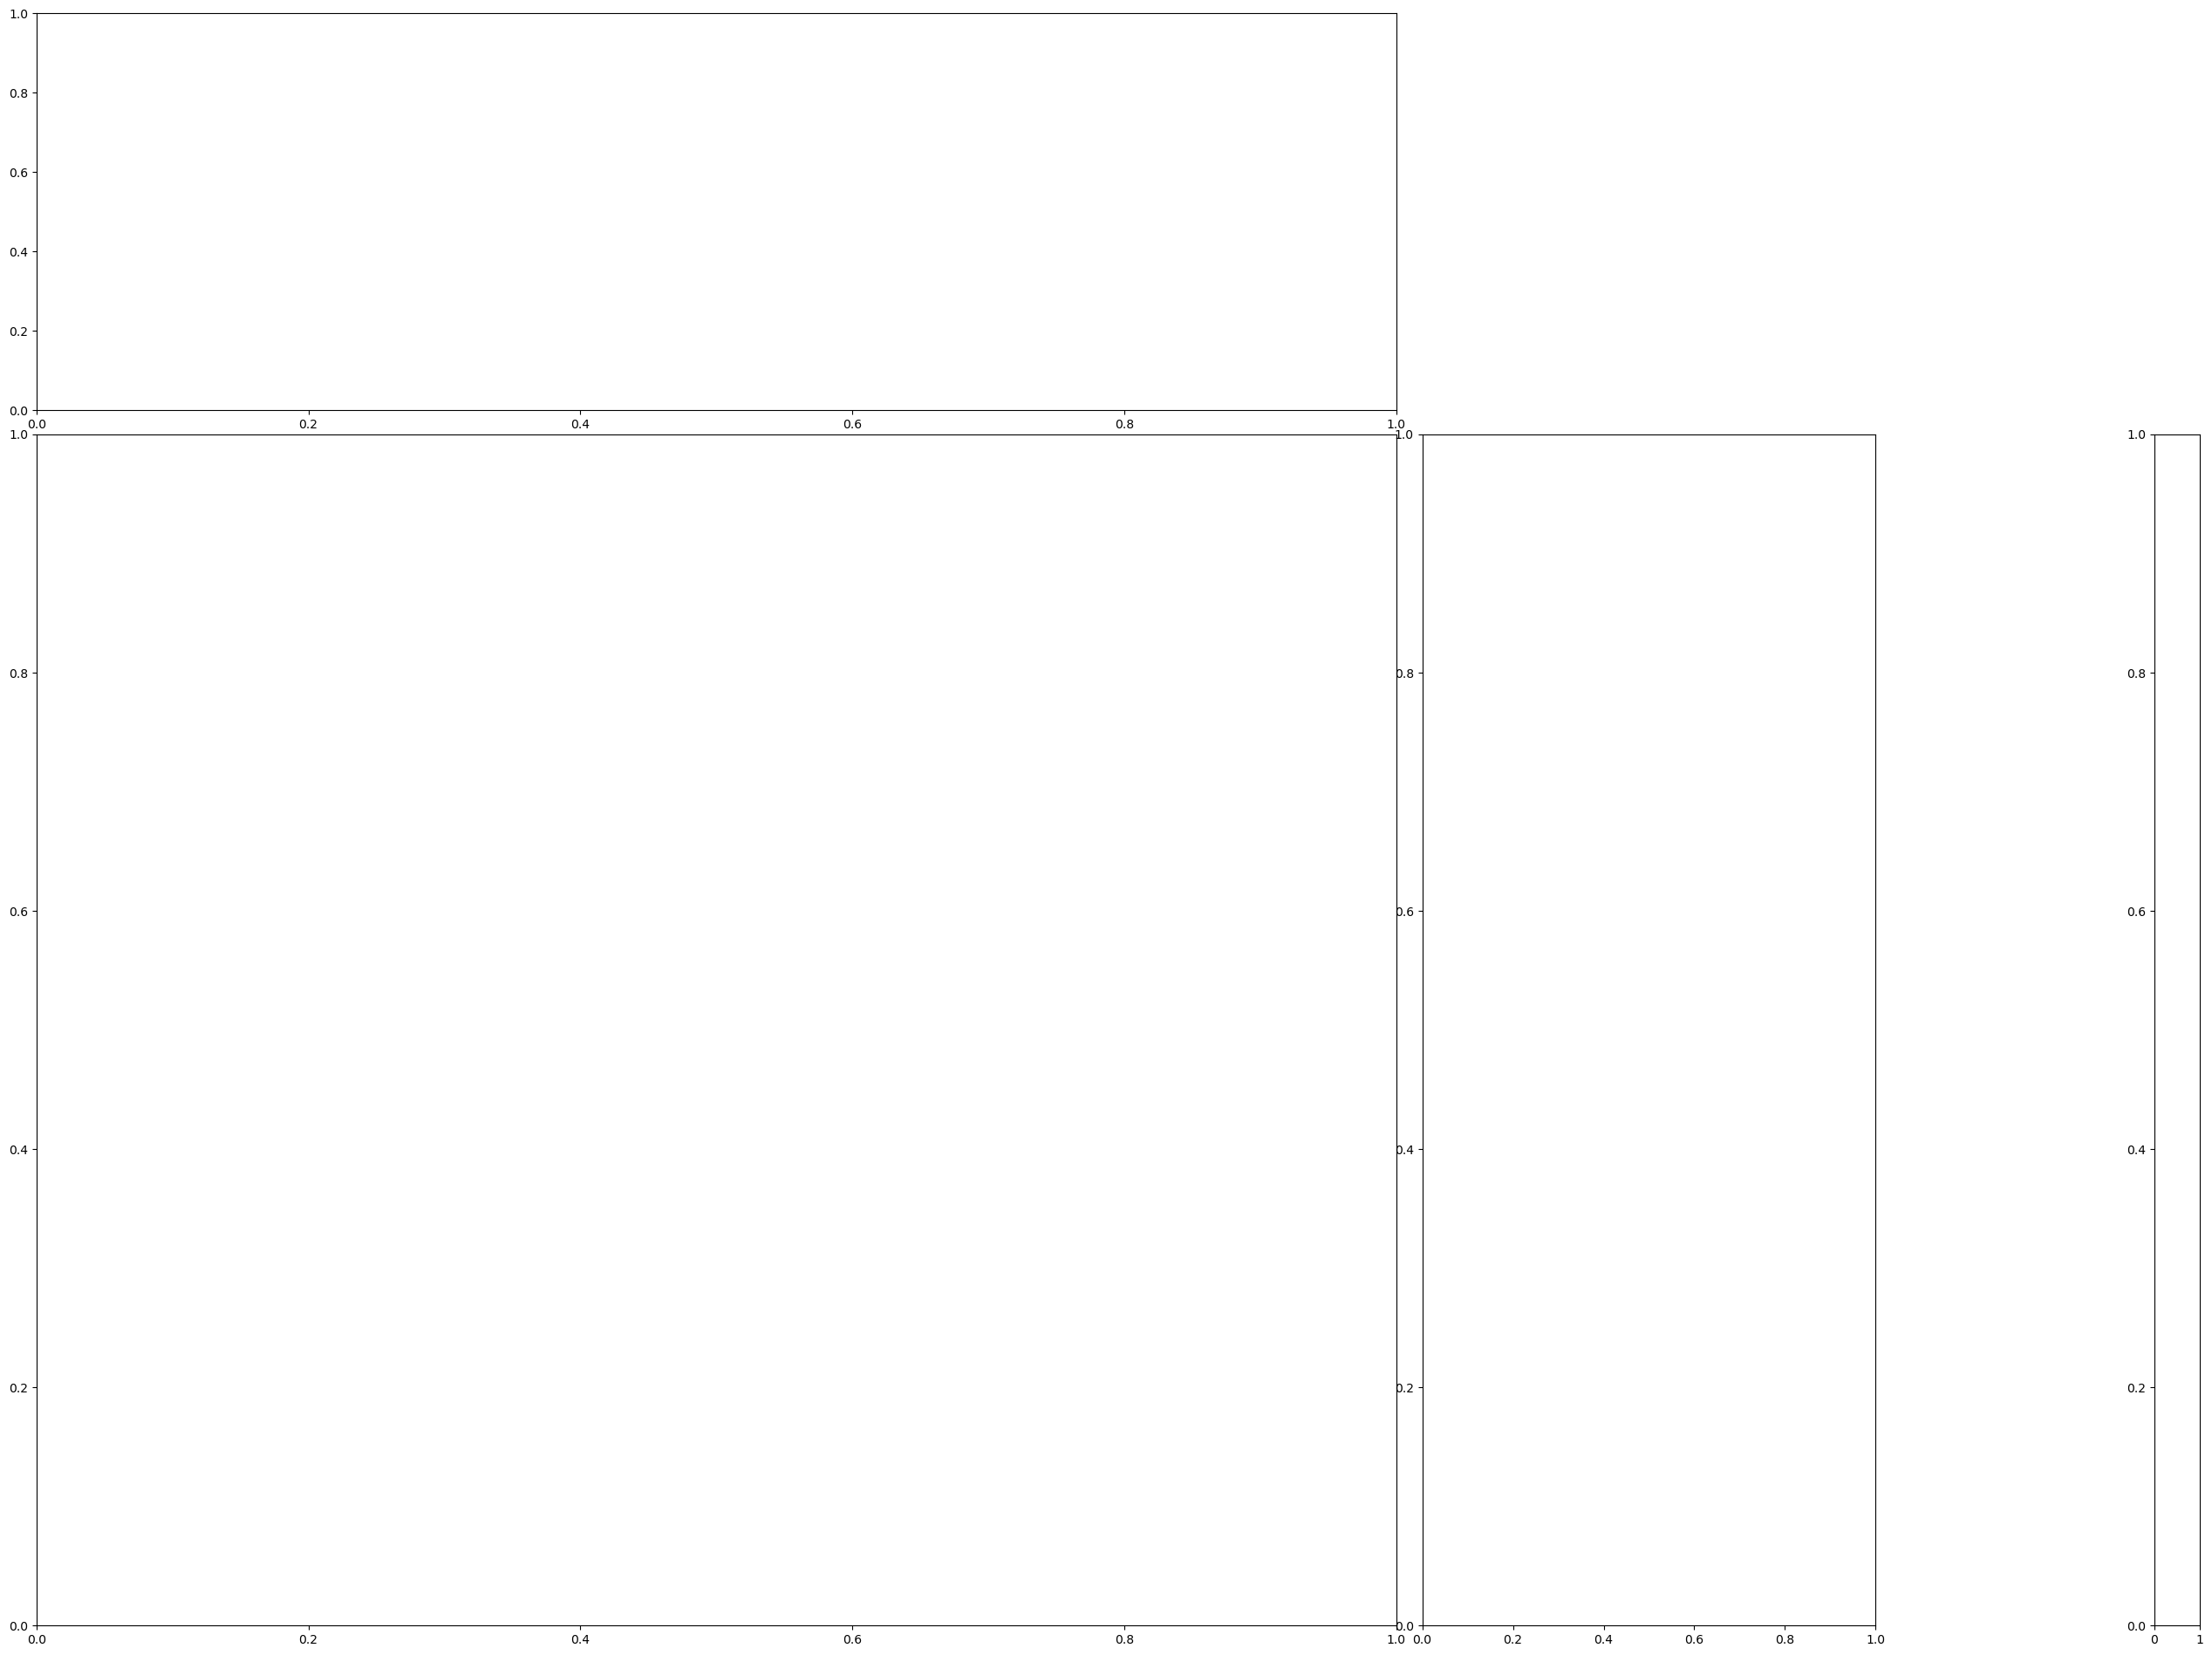

In [21]:
#fig = plt.figure(figsize=(8, 6))
fig = plt.figure(figsize=(32, 24))

hspace = 0.03
wspace = 0.05

purple_rgb = tuple([0.57916573903086, 0.33934576125314425, 0.5219003947563425])

# making the gridspec and separating each piece
grid = GridSpec(2, 4, figure=fig, height_ratios=[1, 3], width_ratios=[3, 1, 0.5, 0.1], hspace=hspace, wspace=wspace)

top_panel = fig.add_subplot(grid[0, 0])
large_box = fig.add_subplot(grid[1, 0])

right_panel = fig.add_subplot(grid[1, 1])
legend_panel = fig.add_subplot(grid[1, 3])

# drawing a heatmap in the large box
#sns.heatmap(a_plus_counts_matrix, robust=False, ax=large_box, xticklabels=True, yticklabels=True, cbar_kws={'location': 'bottom'})
sns.heatmap(maxq_counts_matrix, robust=False, ax=large_box,
            annot=a_plus_counts_matrix, annot_kws={'fontsize': 5},
            xticklabels=True, yticklabels=True,
            cbar=True, cbar_ax=legend_panel, 
            cmap=sns.cubehelix_palette(as_cmap=True), linewidths=0.003,
            cbar_kws={'label': 'Proportion of Samples with Q-value < 0.05 (N = {})'.format(num_a_samples), 'location': 'left'})
large_box.set(xlabel='', ylabel='')

# drawing a barplot of 1D motif frequencies across the whole genome
sns.barplot(x='Motif', y='Sim_Count', data=col_oned_motif_counts, color=purple_rgb, ax=top_panel)
top_panel.set(xticklabels=[], xlabel='', ylabel='Genome-wide\nFrequency', xticks=[])
sns.despine(ax=top_panel, right=True, top=True)

# drawing a barplot of 1D motif frequencies across the top 25 motif pairs
sns.barplot(y='Motif', x='topn_freq', data=row_oned_motif_counts, color=purple_rgb, ax=right_panel)
right_panel.set(yticklabels=[], ylabel='', xlabel='Top 25\nFrequency', yticks=[])
sns.despine(ax=right_panel, right=True, top=True)

# save the figure 
fn = os.path.join(outdir, 'motif_pair_distributions.max_log10_qvalue.V1.png')
fig.savefig(fn, dpi=600, bbox_inches='tight')

In [ ]:
outdir_shared = os.path.join(os.getcwd(), outdir)
outdir_shared = outdir_shared.replace('/mnt/bioadhoc/', 'Z:/')
print(outdir_shared)